In [1]:
#1 Importing Relevant Libraries

import json
import string
import random 
import colorama
colorama.init()
from colorama import Fore, Style, Back

import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer 
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout
nltk.download("punkt")
nltk.download("wordnet")
from tensorflow.keras.utils import plot_model

2024-05-07 17:27:17.803238: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-07 17:27:17.854107: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 17:27:17.854167: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 17:27:17.855889: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-07 17:27:17.864395: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-07 17:27:17.865233: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
#2 Loading the Dataset: intents.json

data_file = open('datasets/intents.json').read()
datafr_file = open('datasets/intentsfr.json').read()

data = json.loads(data_file)
datafr = json.loads(datafr_file)

data
datafr

{'intents': [{'tag': 'salutation',
   'patterns': ['Bonjour',
    'Salut',
    'Coucou',
    'Hey',
    "Bonjour, quelqu'un est là ?",
    'Hello',
    'Salutations'],
   'responses': ['Bonjour ! Comment puis-je vous aider ?',
    'Salut ! Je suis là pour vous aider. Que puis-je faire pour vous ?',
    'Salut, comment puis-je vous assister ?',
    'Bonjour ! En quoi puis-je vous être utile ?']},
  {'tag': 'Aurevoir',
   'patterns': ['Au revoir', 'Adieu', 'À bientôt', 'À plus tard'],
   'responses': ['Au revoir ! Passez une excellente journée.',
    'À bientôt ! Prenez soin de vous.',
    'Au revoir ! Revenez quand vous voulez.',
    "À plus tard ! N'hésitez pas à revenir si vous avez d'autres questions."]},
  {'tag': 'remerciements',
   'patterns': ['Merci',
    'Merci beaucoup',
    "C'est très gentil",
    'Je te remercie',
    'Tu es le meilleur!'],
   'responses': ['De rien ! Je suis là pour vous aider.',
    "Je suis ravi d'avoir pu vous aider !",
    "Avec plaisir ! N'hésitez pas

#### For data in English

In [3]:
#3 Extracting data_X(features) and data_Y(Target)

words = [] #For Bow model/ vocabulary for patterns
classes = [] #For Bow  model/ vocabulary for tags
data_X = [] #For storing each pattern
data_y = [] #For storing tag corresponding to each pattern in data_X 
# Iterating over all the intents

for intent in data["intents"]:
    for pattern in intent["patterns"]:
        tokens = nltk.word_tokenize(pattern) # tokenize each pattern 
        words.extend(tokens) #and append tokens to words
        data_X.append(pattern) #appending pattern to data_X
        data_y.append(intent["tag"]) ,# appending the associated tag to each pattern 
    
    # adding the tag to the classes if it's not there already 
    if intent["tag"] not in classes:
        classes.append(intent["tag"])

# initializing lemmatizer to get stem of words
lemmatizer = WordNetLemmatizer()

# lemmatize all the words in the vocab and convert them to lowercase
# if the words don't appear in punctuation
words = [lemmatizer.lemmatize(word.lower()) for word in words if word not in string.punctuation]
# sorting the vocab and classes in alphabetical order and taking the # set to ensure no duplicates occur
words = sorted(set(words))
classes = sorted(set(classes))

##### For data in French

In [4]:
#3 Extracting data_X(features) and data_Y(Target)

wordsfr = [] #For Bow model/ vocabulary for patterns
classesfr = [] #For Bow  model/ vocabulary for tags
datafr_X = [] #For storing each pattern
datafr_y = [] #For storing tag corresponding to each pattern in data_X 
# Iterating over all the intents

for intent in datafr["intents"]:
    for pattern in intent["patterns"]:
        tokensfr = nltk.word_tokenize(pattern) # tokenize each pattern 
        wordsfr.extend(tokensfr) #and append tokens to words
        datafr_X.append(pattern) #appending pattern to data_X
        datafr_y.append(intent["tag"]) ,# appending the associated tag to each pattern 
    
    # adding the tag to the classes if it's not there already 
    if intent["tag"] not in classesfr:
        classesfr.append(intent["tag"])

# initializing lemmatizer to get stem of words
lemmatizer = WordNetLemmatizer()

# lemmatize all the words in the vocab and convert them to lowercase
# if the words don't appear in punctuation
wordsfr = [lemmatizer.lemmatize(word.lower()) for word in wordsfr if word not in string.punctuation]
# sorting the vocab and classes in alphabetical order and taking the # set to ensure no duplicates occur
wordsfr = sorted(set(wordsfr))
classesfr = sorted(set(classesfr))

#### For data in English

In [5]:
# 4 Text to Numbers
training = []
out_empty = [0] * len(classes)
# creating the bag of words model
for idx, doc in enumerate(data_X):
    bow = []
    text = lemmatizer.lemmatize(doc.lower())
    for word in words:
        bow.append(1) if word in text else bow.append(0)
    # mark the index of class that the current pattern is associated
    # to
    output_row = list(out_empty)
    output_row[classes.index(data_y[idx])] = 1
    # add the one hot encoded BoW and associated classes to training 
    training.append([bow, output_row])
# shuffle the data and convert it to an array
random.shuffle(training)
training = np.array(training, dtype=object)
# split the features and target labels
train_X = np.array(list(training[:, 0]))
train_Y = np.array(list(training[:, 1]))

#### For data in French

In [6]:
# 4 Text to Numbers
trainingfr = []
out_emptyfr = [0] * len(classesfr)
# creating the bag of words model
for idx, doc in enumerate(datafr_X):
    bow = []
    text = lemmatizer.lemmatize(doc.lower())
    for word in wordsfr:
        bow.append(1) if word in text else bow.append(0)
    # mark the index of class that the current pattern is associated
    # to
    output_row = list(out_emptyfr)
    output_row[classesfr.index(datafr_y[idx])] = 1
    # add the one hot encoded BoW and associated classes to training 
    trainingfr.append([bow, output_row])
# shuffle the data and convert it to an array
random.shuffle(trainingfr)
trainingfr = np.array(trainingfr, dtype=object)
# split the features and target labels
trainfr_X = np.array(list(trainingfr[:, 0]))
trainfr_Y = np.array(list(trainingfr[:, 1]))

#### For data in English

In [7]:
#5 The Neural Network Model
model = Sequential()
model.add(Dense(128, input_shape=(len(train_X[0]),), activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(train_Y[0]), activation = "softmax"))
adam = tf.keras.optimizers.Adam(learning_rate=0.01, epsilon=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=["accuracy"])
print(model.summary())
model.fit(x=train_X, y=train_Y, epochs=250)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               26752     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 85)                5525      
                                                                 
Total params: 40533 (158.33 KB)
Trainable params: 40533 (158.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/250


2024-05-07 17:27:23.055299: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-07 17:27:23.061580: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


14/14 [==============================] - 1s 3ms/step - loss: 4.4280 - accuracy: 0.0246
Epoch 2/250
14/14 [==============================] - 0s 3ms/step - loss: 4.1604 - accuracy: 0.0714
Epoch 3/250
14/14 [==============================] - 0s 2ms/step - loss: 3.7785 - accuracy: 0.1250
Epoch 4/250
14/14 [==============================] - 0s 2ms/step - loss: 3.4016 - accuracy: 0.1763
Epoch 5/250
14/14 [==============================] - 0s 2ms/step - loss: 3.0190 - accuracy: 0.2321
Epoch 6/250
14/14 [==============================] - 0s 2ms/step - loss: 2.6258 - accuracy: 0.2969
Epoch 7/250
14/14 [==============================] - 0s 3ms/step - loss: 2.3071 - accuracy: 0.3817
Epoch 8/250
14/14 [==============================] - 0s 3ms/step - loss: 2.1466 - accuracy: 0.3683
Epoch 9/250
14/14 [==============================] - 0s 2ms/step - loss: 1.8380 - accuracy: 0.4643
Epoch 10/250
14/14 [==============================] - 0s 2ms/step - loss: 1.9018 - accuracy: 0.4576
Epoch 11/250
14/14 [=

#### For data in French

In [8]:
#5 The Neural Network Model
modelfr = Sequential()
modelfr.add(Dense(128, input_shape=(len(trainfr_X[0]),), activation="relu"))
modelfr.add(Dropout(0.5))
modelfr.add(Dense(57, activation="relu"))
modelfr.add(Dropout(0.5))
modelfr.add(Dense(len(trainfr_Y[0]), activation = "softmax"))
adam = tf.keras.optimizers.Adam(learning_rate=0.01, epsilon=1e-6)
modelfr.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=["accuracy"])
print(modelfr.summary())
modelfr.fit(x=trainfr_X, y=trainfr_Y, epochs=250)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               35712     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 57)                7353      
                                                                 
 dropout_3 (Dropout)         (None, 57)                0         
                                                                 
 dense_5 (Dense)             (None, 79)                4582      
                                                                 
Total params: 47647 (186.12 KB)
Trainable params: 47647 (186.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/250

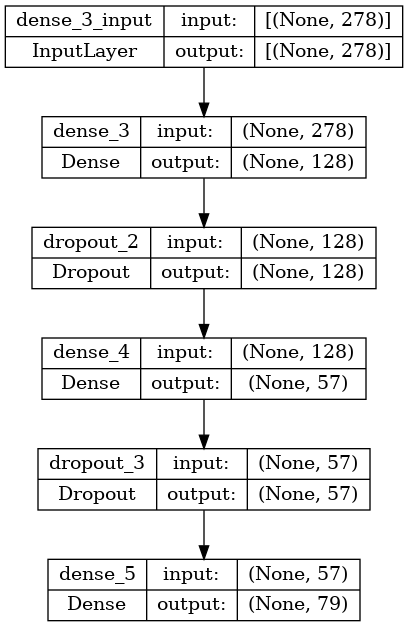

In [9]:
dot_img_file = '/tmp/model.png'
plot_model(model, to_file=dot_img_file, show_shapes=True)


dot_img_filefr = '/tmp/modelfr.png'
plot_model(modelfr, to_file=dot_img_file, show_shapes=True)

In [10]:
#7 to save the trained model
model.save("my_models/chat_model")


#7 to save the trained model
modelfr.save("my_models/chat_modelfr")

INFO:tensorflow:Assets written to: my_models/chat_model/assets


INFO:tensorflow:Assets written to: my_models/chat_model/assets


INFO:tensorflow:Assets written to: my_models/chat_modelfr/assets


INFO:tensorflow:Assets written to: my_models/chat_modelfr/assets


#### For data in English

In [12]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


input_shape=Input(shape=(len(train_X[0]),))

#Defining intermediate layers
x = Dense(128, activation='relu')(input_shape)
x = Dense(64, activation='relu')(x)


#Defining output layer
outputs = Dense(85, activation='softmax')(x)

#5 The Neural Network Model
model = Model()
#Creating the model
model = Model(inputs=input_shape, outputs=outputs)

#Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())
model.fit(train_X, train_Y, epochs=250, verbose=1)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 208)]             0         
                                                                 
 dense_9 (Dense)             (None, 128)               26752     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 85)                5525      
                                                                 
Total params: 40533 (158.33 KB)
Trainable params: 40533 (158.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/250
14/14 [==============================] - 1s 3ms/step - loss: 0.6335 - accuracy: 0.0022
Epoch 2/250
14/14 [==============================

#### For data in French

In [15]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


input_shape=Input(shape=(len(trainfr_X[0]),))

#Defining intermediate layers
x = Dense(128, activation='relu')(input_shape)
x = Dense(64, activation='relu')(x)


#Defining output layer
outputs = Dense(79, activation='softmax')(x)

#5 The Neural Network Model
modelfr = Model()
#Creating the model
modelfr = Model(inputs=input_shape, outputs=outputs)

#Compiling the model
modelfr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(modelfr.summary())
modelfr.fit(trainfr_X, trainfr_Y, epochs=250, verbose=1)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 278)]             0         
                                                                 
 dense_18 (Dense)            (None, 128)               35712     
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 79)                5135      
                                                                 
Total params: 49103 (191.81 KB)
Trainable params: 49103 (191.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/250
11/11 [==============================] - 1s 3ms/step - loss: 0.6643 - accuracy: 0.0171
Epoch 2/250
11/11 [==============================

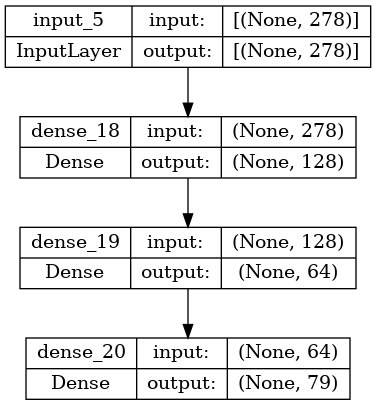

In [16]:

dot_img_file = '/tmp/model_1.png'
plot_model(model, to_file=dot_img_file, show_shapes=True)


dot_img_file = '/tmp/modelfr_1.png'
plot_model(modelfr, to_file=dot_img_file, show_shapes=True)

In [17]:
#7 to save the trained model
model.save("my_models/chat_model1")


#7 to save the trained model
modelfr.save("my_models/chat_modelfr1")

INFO:tensorflow:Assets written to: my_models/chat_model1/assets


INFO:tensorflow:Assets written to: my_models/chat_model1/assets


INFO:tensorflow:Assets written to: my_models/chat_modelfr1/assets


INFO:tensorflow:Assets written to: my_models/chat_modelfr1/assets


#### For data in English

In [18]:
#6 Preprocessing the Input

def clean_text(text): 
  tokens = nltk.word_tokenize(text)
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  return tokens

def bag_of_words(text, vocab): 
  tokens = clean_text(text)
  bow = [0] * len(vocab)
  for w in tokens: 
    for idx, word in enumerate(vocab):
      if word == w: 
        bow[idx] = 1
  return np.array(bow)

def pred_class(text, vocab, labels): 
  bow = bag_of_words(text, vocab)
  result = model.predict(np.array([bow]))[0] #Extracting probabilities
  thresh = 0.5
  y_pred = [[indx, res] for indx, res in enumerate(result) if res > thresh]
  y_pred.sort(key=lambda x: x[1], reverse=True) #Sorting by values of probability in decreasing order
  return_list = []
  for r in y_pred:
    return_list.append(labels[r[0]]) #Contains labels(tags) for highest probability 
  return return_list

def get_response(intents_list, intents_json): 
  if len(intents_list) == 0:
    result = "Sorry! I don't understand."
  else:
    tag = intents_list[0]
    list_of_intents = intents_json["intents"]
    for i in list_of_intents: 
      if i["tag"] == tag:
        result = random.choice(i["responses"])
        break
  return result

#### For data in French

In [19]:
#6 Preprocessing the Input

def clean_textfr(text): 
  tokens = nltk.word_tokenize(text)
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  return tokens

def bag_of_wordsfr(text, vocab): 
  tokens = clean_textfr(text)
  bow = [0] * len(vocab)
  for w in tokens: 
    for idx, word in enumerate(vocab):
      if word == w: 
        bow[idx] = 1
  return np.array(bow)

def pred_classfr(text, vocab, labels): 
  bow = bag_of_wordsfr(text, vocab)
  result = modelfr.predict(np.array([bow]))[0] #Extracting probabilities
  thresh = 0.5
  y_pred = [[indx, res] for indx, res in enumerate(result) if res > thresh]
  y_pred.sort(key=lambda x: x[1], reverse=True) #Sorting by values of probability in decreasing order
  return_list = []
  for r in y_pred:
    return_list.append(labels[r[0]]) #Contains labels(tags) for highest probability 
  return return_list

def get_responsefr(intents_list, intents_json): 
  if len(intents_list) == 0:
    result = "Sorry! I don't understand."
  else:
    tag = intents_list[0]
    list_of_intents = intents_json["intents"]
    for i in list_of_intents: 
      if i["tag"] == tag:
        result = random.choice(i["responses"])
        break
  return result

In [20]:
def chat():
   
    
    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        intents = pred_class(inp, words, classes)
        result = get_response(intents, data)
        print(Fore.GREEN + "Bao:" + Style.RESET_ALL , result)

        # print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))

print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()

Start messaging with the bot (type quit to stop)!
User: 